# Performing clustering on Mall Customers dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.duplicated().sum()

0

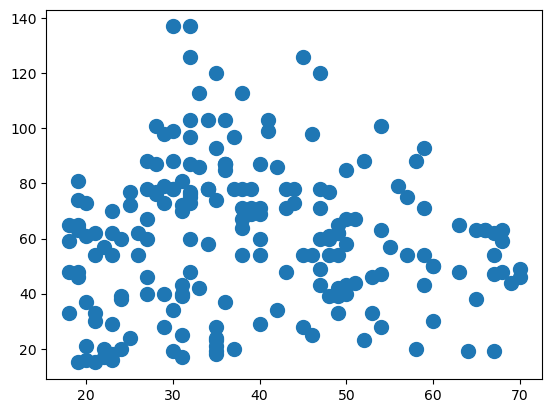

In [8]:
#data visualization
plt.scatter(data['Age'], data['Annual Income (k$)'],s=100)

In [9]:
#by looking at data there is not such of clustering
data_clu=data.loc[:,['Age', 'Annual Income (k$)']]

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

distance_matrix = pdist(data_clu)
linked = linkage(distance_matrix, 'ward')

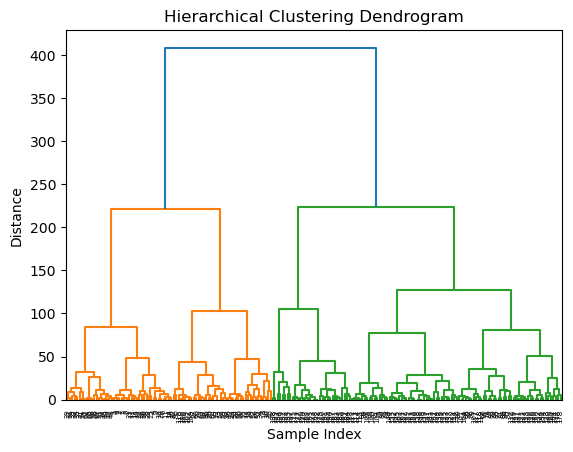

In [11]:
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [34]:
#predict mu clusters
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(data_clu)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [35]:
cl=cluster.fit_predict(data_clu)

In [36]:
#evalutaing the cluster
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(data_clu,cl)
# Clustering Result: 0.41 — The clustering performance is not satisfactory (41%)

0.4104652474372429

In [16]:
X=data_clu.values

Text(0, 0.5, 'annual income')

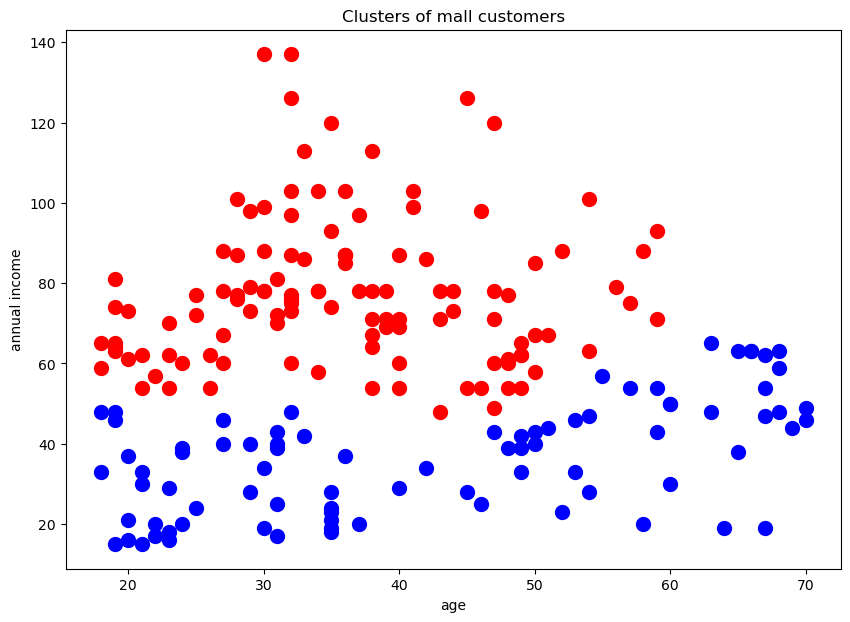

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(X[cl==0,0],X[cl==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[cl==1,0],X[cl==1,1],s=100,c='blue',label='Cluster 2')
plt.title('Clusters of mall customers')
plt.xlabel('age')
plt.ylabel('annual income')

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
#50,90
for n_clusters in range(50, 70):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data_clu)
    silhouette_avg = silhouette_score(data_clu, cluster_labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg}")
#So, it appears that the highest silhouette score we can achieve is with 60 clusters.

For n_clusters=50, the silhouette score is 0.4264535130867607
For n_clusters=51, the silhouette score is 0.4311031094983938
For n_clusters=52, the silhouette score is 0.4325689716150737
For n_clusters=53, the silhouette score is 0.43633580794233867
For n_clusters=54, the silhouette score is 0.4393875148340449
For n_clusters=55, the silhouette score is 0.44372166116299844
For n_clusters=56, the silhouette score is 0.4453243254245589
For n_clusters=57, the silhouette score is 0.44850525083605247
For n_clusters=58, the silhouette score is 0.4543496172387734
For n_clusters=59, the silhouette score is 0.4532134095104729
For n_clusters=60, the silhouette score is 0.45495870623466345
For n_clusters=61, the silhouette score is 0.45427105755935643
For n_clusters=62, the silhouette score is 0.45378795825483353
For n_clusters=63, the silhouette score is 0.45434115093969607
For n_clusters=64, the silhouette score is 0.4552428487878377
For n_clusters=65, the silhouette score is 0.45107511114048277
